In [1]:
#from IPython.external import mathjax; mathjax.install_mathjax()
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import healpy.projector as pro
import astropy.io.fits as fits
from scipy.stats import gaussian_kde
import scipy
import pandas as pd
import pickle
matplotlib.style.use('seaborn-bright')
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import seaborn as sb

# Outline:
### Introduction:
  * What is anomalous microwave emission? (AME)
  * Why is AKARI useful?

### Our approach:
  * Compare Planck AME map with IR maps
  * Can we say more than "AME Correlates with dust"

### Results:
  * All-sky comparison - AME vs. IRC
  * $\lambda$ Orionis - 

### Discussion:
  * Can we rule out spinning dust?
  * What about effect of uncertainties on the correlation?
  * Do we need better AME data?

### Future (ongoing)) work:
  * Dust SED fittin (with help from Galliano-sensei)
  Tangential work:
  * Explore all-sky data with machine learning methods

In [2]:
lfi30ghz = hp.read_map('../../../Python/Projects/PlanckPCA/data/planck/LFI_SkyMap_030-BPassCorrected_0256_R2.01_full.fits')

NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


# Intro: What's in the microwave sky?

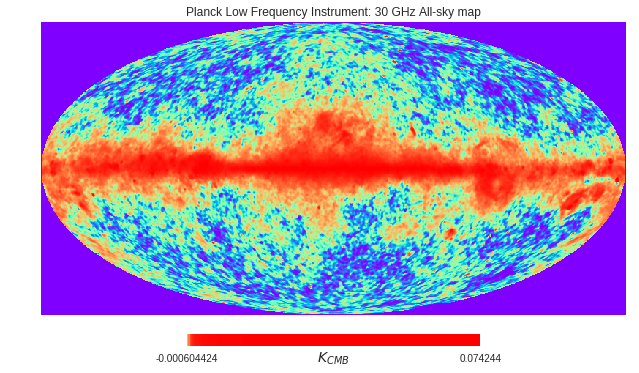

In [3]:
hp.mollview(lfi30ghz,
           title = 'Planck Low Frequency Instrument: 30 GHz All-sky map',
           norm = 'hist',
           cmap = 'rainbow',
           unit = '$K_{CMB}$')

![alt text](https://lambda.gsfc.nasa.gov/product/foreground/fg_images/Planck_A12_Fig24_left.png "Galactic Microwave Foreground SED")

###### From "Planck 2015 results. X. Diffuse component separation: Foreground maps":
`https://arxiv.org/abs/1502.01588`

# Our approach

* ### Compare AKARI, Planck, and IRAS maps to the Planck AME Component map:

  1. #### All-sky comparison
  2. #### Localized inspection of $\lambda$ Orionis

* ### Major caveats:
  * #### Limited to ~1-degree resolution
  * #### No "ground truth" AME map !!
  * #### Envrionmental variations not well constrained on an all-sky basis

### Intro: Why AKARI?

* #### Dominated by PAH emission features
* #### IRC 9 $\mu{}m$ to IRAS 12 $\mu{}m$ ratio may reveal trends in PAH ionization


![band-ratio-G100.png](../Plots/png/band-ratio-G100.png)
  * $G_{0}$ indicates the interstellar radiation field relative to the solar neighborhood

# All-sky results

### Each IR band's intensity vs. AME Intensity:

(2D Kernel Density plots)
![AMEvsDust_allsky_allbands__mpsub_kde.png](../Plots/png/AMEvsDust_allsky_allbands__mpsub_kde.png)

## What if scale by the radiation field strength ($U$)?


![AMEvsDust_allsky_allbands__mpsub__UNorm_kde.png](../Plots/png/AMEvsDust_allsky_allbands__mpsub__UNorm_kde.png)

  * $U$ is approximated as the dust radiance $R$ divided by the optical depth $\tau_{353 GHz}$
  * $R$ and $\tau_{353 GHz}$ are from the Planck PR1 thermal dust parameter maps

### Spearman Correlation Matrix: 
IR Bands' Intensity and AME

![all_bands_corr_matrix_wAME_spearmanintensity.png](../Plots/png/all_bands_corr_matrix_wAME_spearmanintensity.png)

#### Spearman Correlations: After normalizing data by $U$,  ( ~ $\frac{R}{\tau_{353 GHz}}$)

![all_bands_corr_matrix_wAME_spearmanU_norm.png](../Plots/png/all_bands_corr_matrix_wAME_spearmanU_norm.png)

In [4]:
#### Almost no change when dividing by $U$

In [5]:
### Spatial Variation of Correlation Strength

### $I_{9}$ to   $I_{AME}$ correlation strength for ~10 degree patches:
![](../Plots/Allsky_Corr/Spearman_Map_nside8_A9toAME.png)
  * ###### Looks like a Galaxy...
  * ###### Weaker correlation at higher latitudes

### $I_{140}$ to   $I_{AME}$ correlation strength for ~10 degree patches:
![](../Plots/Allsky_Corr/Spearman_Map_nside8_A140toAME.png)

### What if we normalize by the dust radiance?
![](../Plots/Allsky_Corr/RadNorm/Spearman_Map_nside8_A9toAME.png)

![](../Plots/Allsky_Corr/RadNorm/Spearman_Map_nside8_A140toAME.png)

# $\lambda$  Orionis Results: 

![LOri_akari9_AMEcont_1dres.png](../Plots/png/LOri_akari9_AMEcont_1dres.png)
  * The binary star $\lambda$ Orionis, is located near the center of the ring.

![lOrionis_grid_img.png](../Plots/lOrionis_grid_img.png)

# $\lambda$  Orionis Results:
__Spearman Correlation Matrix__

![](../Plots/png/Allsky_corr_Lori.png)

# $\lambda$  Orionis Results:
#### What about PAH ionization fraction?

![](../Plots/png/Lori_A9I12.png)



# Conclusions:

  * Present data do not rule out spinning-PAHs, however:

In [6]:
  * PAH-tracing emission correlates as well with AME as FIR in $\lambda$ Orionis

SyntaxError: invalid syntax (<ipython-input-6-4017f3ef99ba>, line 1)

In [ ]:
  * Correlation of 9 to 12 $\mu{}m$ ratio suggests PAH ionization needs more consideration.

### Open questions:
  * What affect do noise and systematic affects of have on these correlation tests?
  * If not PAHs, what about other spinning stuff? (T. Hoang's talk)
  * How well do the Planck Component maps really constrain AME?
  * Do we know enough about the dust in different environments? (F. Boulanger's talk)

### Future (Ongoing) Work:
  * Dust SED modelling (with F. Galliano) -- taking consideration of uncertainties
  * Comparing Planck component separation with "blind" component separation techniques. (I.e. PCA, ICA, NMF)
    